In [2]:
import pandas as pd

fred = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
fred.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
fred.shape

(41188, 21)

In [4]:
fred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
f_dup = fred.duplicated().sum()
print(f_dup)



12


In [6]:
duplicate_rows = fred[fred.duplicated(keep=False)]

pd.set_option('display.max_columns', None) 
print(duplicate_rows)

       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married       

In [7]:
fred = fred.drop_duplicates()

fred.duplicated().sum()


np.int64(0)

I decided to remove the 24 rows of duplicates because I still have more than 40 000 rows, so the change is not significant.

I am going to drop these columns because these are economic indicators that do not necessarily represent a single individual in this dataset;

6. `emp.var.rate`. Employment variation rate. Quarterly indicator (numeric)
17. `cons.price.idx`. Consumer price index. Monthly indicator (numeric)
18. `cons.conf.idx`. Consumer confidence index. Monthly indicator (numeric)
19. `euribor3m`. EURIBOR 3-month rate. Daily indicator (numeric)
20. `nr.employed`. Number of employees. Quarterly indicator (numeric)

These values may bring clues as to what the general direction of where the market is going, but it is not a useful feature to be included in my modelling to be accurate. 





        

In [8]:
fred.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed'], axis = 1, inplace = True)
fred.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


I am deciding to handle nulls before I proceed to variable analysis so that, it does not skew any correlations I want to measure.

In [9]:
fred.isnull().sum().sort_values(ascending=False)

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

My data is clean and relevant, and there are no missing values. 

VARIABLE ANALYSIS 

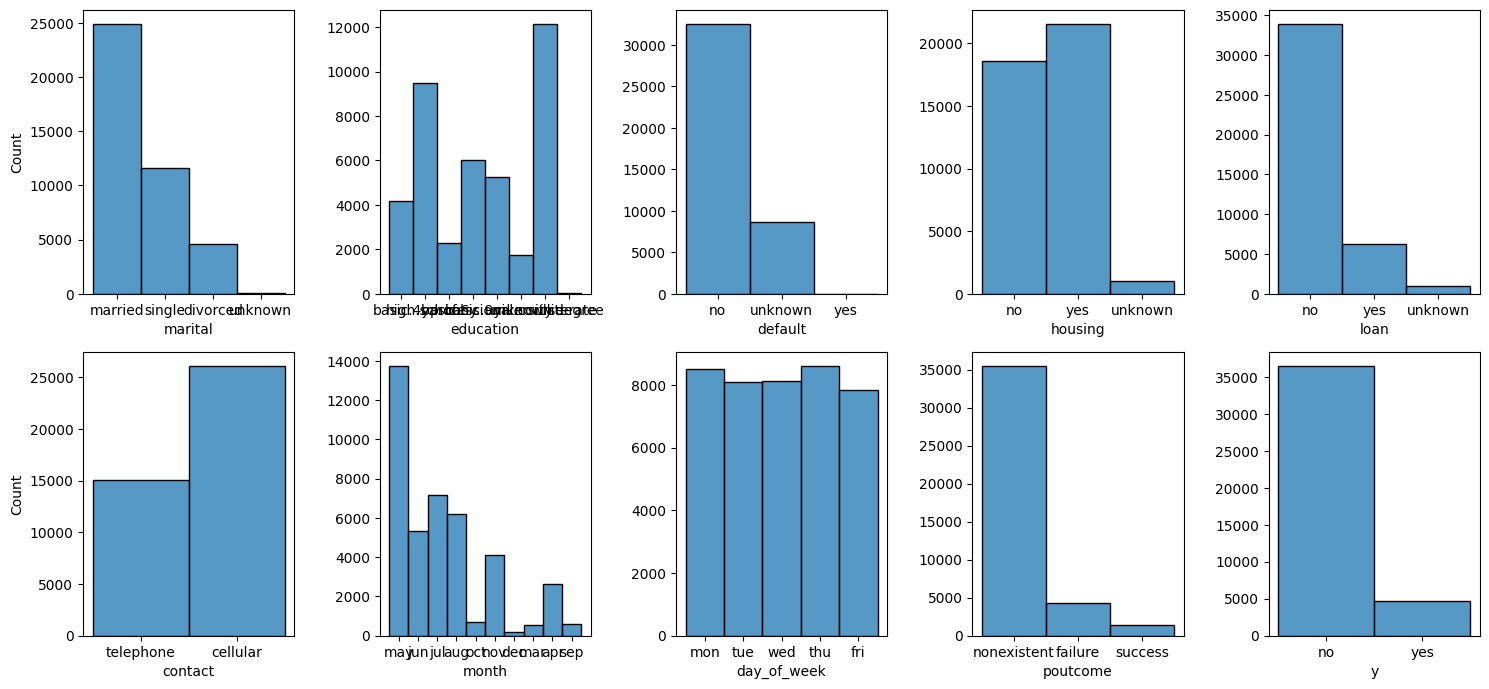

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 5, figsize=(15, 7)) 

axes = axes.flatten()

columns_to_plot = ["marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"] 

for i, column in enumerate(columns_to_plot):
    if column in fred.columns:
      if column in ["Survived"]:
        sns.histplot(ax=axes[i], data=fred, x=column).set_xlim(-0.1, 1.1)
      else:
        sns.histplot(ax=axes[i], data=fred, x=column)
      if i % 5 != 0: 
        axes[i].set(ylabel=None)
    else:
        print(f"Warning: Column '{column}' not found in DataFrame.")

plt.tight_layout()

plt.show()

I want to clean the data and verify the categories in the educational level column; 'education' so I can have a more accurate interpretation of the analysis I am plotting. 

In [11]:
fred['education'] = fred['education'].str.lower()
fred['education'] = fred['education'].str.strip()

unique_education_levels = fred['education'].unique()
print("Unique education levels:")
print(unique_education_levels)
print("Number of unique education levels:", len(unique_education_levels))



Unique education levels:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Number of unique education levels: 8


In [12]:
unique_months = fred['month'].unique()
print(unique_months)
print("Months included in the data set:", len(unique_months))


['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Months included in the data set: 10





 0   age             41188 non-null  int64 
  10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64 